# Assignment 4

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [241]:
NAME = "Joyce Seok"
STUDENT_ID = "1580355"

In [242]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


## Data Exploration and Preprocessing

### Load the Fashion-MNIST dataset
Keras has lots of datsets that you can just load right into python numpy arrays, see: https://keras.io/datasets/

We will be using the Fashion-MNIST dataset, which is a cool little dataset with gray scale $28\times28$ images of articles of clothing.
Keep in mind that they will be downloaded from the internet, so it may take a while.

In [243]:
fashion_mnist = keras.datasets.fashion_mnist
# splitting training and test data and corresponding labels 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [244]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

In [245]:
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

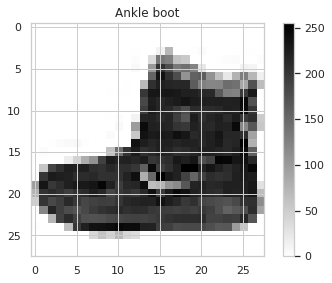

In [246]:
show_image(0)

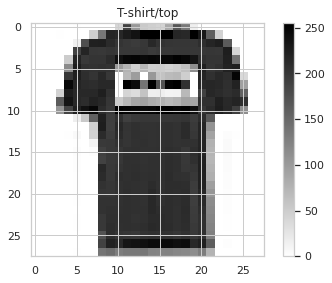

In [247]:
show_image(1)

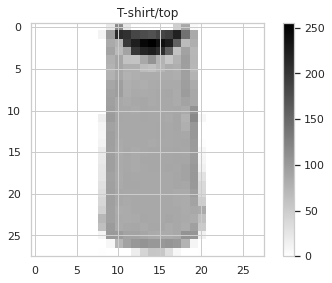

In [248]:
show_image(2)

## Question 1: Data Preprocessing
As you can see above, the images are valued from $[0,255]$. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to $[0,1]$ we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to $[0,1]$ the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between $[-1,1]$, for that you would use a slightly different equation.




### Question 1.1) Normalizing the data
Normalize BOTH the training and testing images using the above equation.

In [249]:
### YOUR CODE HERE ###
train_images = train_images/255
test_images = test_images/255

If we show the image again, you will see the values are all scaled correctly.

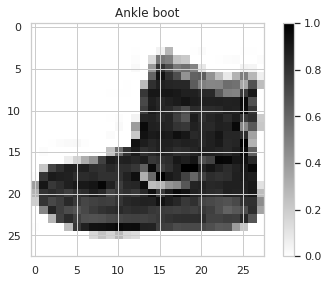

In [250]:
show_image(0)

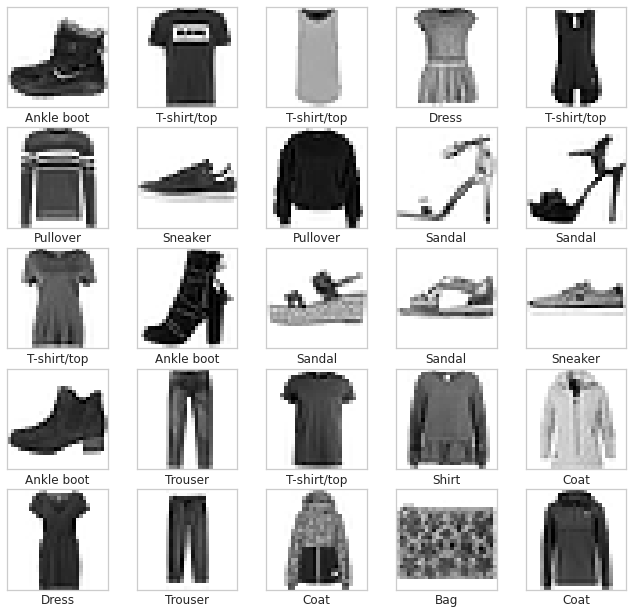

In [251]:
# Lets sample our data to see what kind of images are stored.
# see documentation for subplot here:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Question 1.2) Data Transformation
Since our data is composed of grayscale images (one channel) with a resolution of $28\times28$, we can think of this as the images existing in a $28\times28=784$ dimensional space. This means that every single image in our dataset can be represented by a vector of length $784$.

Please reshape BOTH the training and testing images to be $784D$. 

Hint: look into numpy.reshape().


In [252]:
### YOUR CODE HERE ###

print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')

Before reshape, train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)
Before reshape, train_images shape: (60000, 784) test_images shape: (10000, 784)


We create a dataframe using our training and testing data to keep everything tidy.

In [253]:
# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train["class"] = df_img_train["label"].map(class_dict)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.0,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.0,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3,Dress
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top


In [254]:
# Add test data into a dataframe
img_data = {f"z{i}":test_images[:,i] for i in range(784)}
img_data["label"] = test_labels
df_img_test = pd.DataFrame(img_data)
df_img_test["class"] = df_img_test["label"].map(class_dict)
df_img_test.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.050980,0.262745,0.000000,0.000000,0.000000,0.000000,0.196078,0.149020,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031373,0.470588,0.819608,0.886275,0.968627,...,0.000000,0.000000,0.000000,0.152941,0.976471,1.0,0.482353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192157,0.803922,0.772549,0.043137,0.0,0.015686,0.003922,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,2,Pullover
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.262745,0.694118,0.505882,0.600000,0.458824,0.505882,0.572549,0.552941,0.686275,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,0.768627,1.000000,...,0.988235,0.466667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.384314,0.623529,0.278431,0.000000,0.000000,0.266667,0.690196,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,Trouser
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,0.482353,0.423529,0.388235,0.388235,0.329412,0.325490,0.337255,0.360784,0.274510,0.023529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.415686,0.972549,0.901961,...,0.180392,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078431,0.682353,0.396078,0.000000,0.000000,0.000000,0.572549,0.572549,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,Trouser
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,0.000000,0.223529,0.262745,0.286275,0.298039,0.298039,0.325490,0.243137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.003922,0.003922,0.0,0.000000,0.050980,0.309804,0.501961,0.788235,...,0.772549,0.713725,0.635294,0.239216,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.117647,0.282353,0.372549,0.427451,0.435294,0.435294,0.415686,0.396078,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6,Shirt


Now we have our data reshaped into the $784D$ vectors, we can classify the images using a feed forward artifical neural network.



## Question 2: Neural Network
In this question we will build different neural network models. 

### Question 2.1) Pullovers vs. Coats. 

Build a neural network to your liking and train it for 50 epochs with a 0.2 train/validation split. You will want to use binary cross entropy ("bce") loss as the loss function. See if you can tune your model to achieve 70% accuracy.

In [255]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer
from keras.regularizers import *

# DEFINE YOUR MODEL HERE
### YOUR CODE HERE ###

def build_model():
    input_layer = Input(shape=(784))
    x = Dense(15, activation='sigmoid',kernel_regularizer=l2(0.001))(input_layer)
    x = Dense(5, activation='sigmoid',kernel_regularizer=l2(0.001))(x)
    x = Dense(5, activation='sigmoid',kernel_regularizer=l2(0.001))(x)
    x = Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001))(x)
    return Model(input_layer, x)

In [256]:
# Show a summary of your model
model = build_model()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_50 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_52 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 6         
Total params: 11,891
Trainable params: 11,891
Non-trainable params: 0
_________________________________________________________________


In [257]:

# A function for getting a subset of the data
def get_data_subset(df, classes=[], shuffle=True, shuffle_seed=42):
    """
    Used to retrieve columns from df
    """
    if classes == []:
        print("Pleas")
    else:
        df_filtered = df[(df["class"] == classes[0]) | (df["class"] == classes[1])].copy()
        df_filtered["binary_label"] = 0
        df_filtered.loc[df["class"] == classes[1], "binary_label"] = 1
        data = df_filtered.filter(regex=("z[0-9]+")).values
        labels = df_filtered["binary_label"].values
        if shuffle:
            np.random.seed(shuffle_seed)
            np.random.shuffle(data)
            np.random.seed(shuffle_seed)
            np.random.shuffle(labels)

    return data, labels.reshape(-1,1)

In [258]:
# Preparing data for training, use get_data_subset along with df_img_train

X, y = get_data_subset(df_img_train, classes = ["Shirt", "Pullover"])

In [259]:
# Compile your model with your chosen optimizer, binary cross entropy for the loss, and accuracy as the metric

### YOUR CODE HERE ###

optimizer = Adam()
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [260]:
# Call fit on your model passing in the train_images, train_labels data above, train for 50 epochs 0.2 train/validation split
hist = model.fit(X, y, epochs = 50, validation_split = 0.2, verbose = 1)

Epoch 1/50
300/300 [==============================] - 1s 3ms/step - loss: 0.7011 - accuracy: 0.6216 - val_loss: 0.6882 - val_accuracy: 0.7721
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 0.6666 - accuracy: 0.7796 - val_loss: 0.6437 - val_accuracy: 0.7754
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 0.5916 - accuracy: 0.8199 - val_loss: 0.5511 - val_accuracy: 0.8321
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 0.5249 - accuracy: 0.8400 - val_loss: 0.4986 - val_accuracy: 0.8512
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 0.4923 - accuracy: 0.8430 - val_loss: 0.4826 - val_accuracy: 0.8496
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.8521 - val_loss: 0.5004 - val_accuracy: 0.8246
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.8511 - val_loss: 0.4570 - val_accuracy: 0.8529
Epoch 

In [261]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

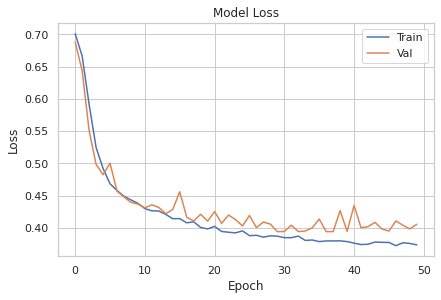

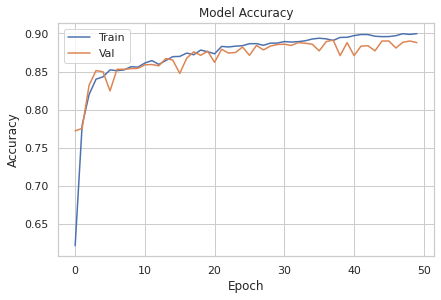

In [262]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

### Question 2.2) Observation
How did your neural network perform? What hyperparameters and optimizer did you choose?

#### The performance was good, with ~94% training accuracy and ~90%val accuracy. I used four dense layers, all having sigmoid as the activation function (to prevent overfitting) and I used the given optimizer Adam().

### Question 2.3) Multi-class Neural Network

Next, we will build a neural network toimplement a multi-class classification. Remember that your input size is (784,) and the output layer needs 10 nodes (also remember that there is a certain activation function that needs to be encorporated with the output layer). See if your model can get about 70% classification accuracy.

**Hint: When compiling your model use loss=tf.keras.losses.[SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) 

In [263]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import * # you can use any optimizer

# DEFINE YOUR MODEL HERE
### YOUR CODE HERE ###

def build_model2():
    input_layer = Input(shape=(784))
    x = Dense(500, activation='sigmoid', kernel_regularizer=l2(0.001))(input_layer)
    x = Dense(500, activation='sigmoid', kernel_regularizer=l2(0.001))(x)
    x = Dense(50, activation='sigmoid', kernel_regularizer=l2(0.001))(x)
    x = Dense(10, activation='softmax', kernel_regularizer=l2(0.001))(x)
    return Model(input_layer, x)


In [264]:
# Show a summary of your model
model = build_model2()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_54 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_55 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_56 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                510       
Total params: 668,560
Trainable params: 668,560
Non-trainable params: 0
_________________________________________________________________


In [265]:
# Compile your model with your chosen optimizer, binary cross entropy for the loss, and accuracy as the metric

### YOUR CODE HERE ###

model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [266]:
# Call fit on your model passing in the train_images, train_labels data above with validation split of 0.2 and train for 100 epochs

hist = model.fit(X, y, epochs = 50, validation_split = 0.2, verbose = 1)

Epoch 1/50
300/300 [==============================] - 1s 3ms/step - loss: 0.9089 - accuracy: 0.6943 - val_loss: 0.6647 - val_accuracy: 0.7654
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 0.5485 - accuracy: 0.8178 - val_loss: 0.5643 - val_accuracy: 0.7962
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 0.5125 - accuracy: 0.8311 - val_loss: 0.5365 - val_accuracy: 0.8092
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 0.4968 - accuracy: 0.8336 - val_loss: 0.9307 - val_accuracy: 0.6121
Epoch 5/50
300/300 [==============================] - 1s 3ms/step - loss: 0.5042 - accuracy: 0.8289 - val_loss: 0.4645 - val_accuracy: 0.8462
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 0.4754 - accuracy: 0.8380 - val_loss: 0.5192 - val_accuracy: 0.8221
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 0.4791 - accuracy: 0.8388 - val_loss: 0.4872 - val_accuracy: 0.8363
Epoch 

In [267]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

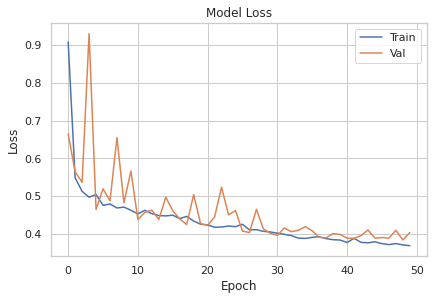

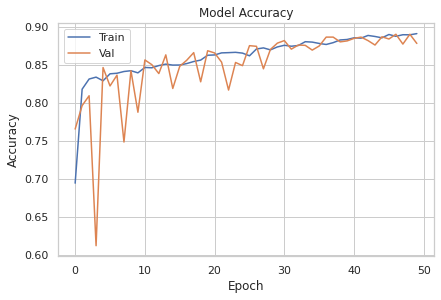

In [268]:
# Plot your losses and accuracies
plot_losses(hist)
plot_accuracies(hist)

### Question 2.4) Observation
How did your neural network perform? What hyperparameters and optimizer did you choose?

#### The performance was similar the previous model but not as good, with ~87% training accuracy and ~89%val accuracy. I used four dense layers, all having sigmoid as the activation function except for the last layer, which had softmax activation. I included l2 regularization to handle overfitting, sparse categorical crossentropy, and I used the given optimizer Adam(). 

## Question 3: Building a Convolutional Neural Network

In this exercise, we will build a classifier model that is able to distinguish between 10 different classes of images - airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. We will follow these steps:

1. Explore the example data
2. Build a small convnet to solve our classification problem
3. Evaluate training and validation accuracy

###  Data Exploration and Preparation

We'll start by downloading the CIFAR-10 dataset from Keras.

This is a link to the dataset documentation:
https://keras.io/datasets/#cifar10-small-image-classification

And a link to the dataset source:
https://www.cs.toronto.edu/~kriz/cifar.html

Be sure to set your Runtime environment to include a GPU, as it will speed up the training considerably (this time that's important!).

#### Loading data into local variables

In [269]:
from keras.datasets import cifar10

# Fetch the data:
(X, y), (_, _) = cifar10.load_data()

####  Import needed functions and libraries

In [270]:
# Ignore the warnings - Otherwise, TensorFlow tends to innundate one with far too many warnings.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For matrix operations and dataframes.
import numpy as np

# Data visualizaton.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random as rn
 
# Configure some defaults.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Useful deep learning functions.
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Powerful deep learning module.
import tensorflow as tf

# For dealing with data.
import numpy as np  

#### Data Preparation & Exploration
Let's take a look at a few of these images. Rerun this cell multiple times to see different images for each class.

You may notice that these images look low fidelity, which is because they are! As we increase our image size, we also increase our model complexity. What's important is that our classes are still distinguishable from each other.

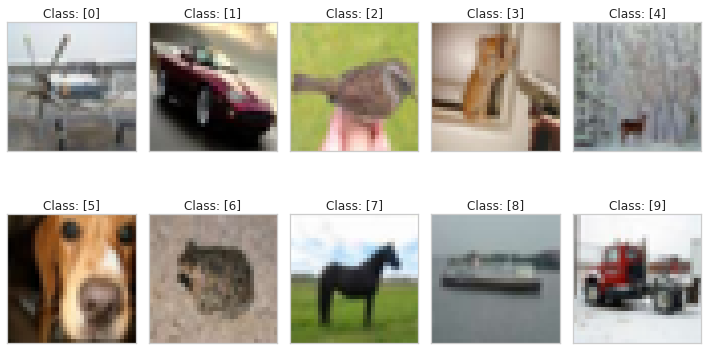

In [271]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 6)

for i in range(2):
    for j in range(5):
        c = j + 5*i # Class counter
        l = np.random.choice(np.where(y == c)[0], 1)[0] # Get a random image from class c
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Class: ' + str(y[l]))
        # Hide grid lines
        ax[i, j].grid(False)
        # Hide axes ticks
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        
plt.tight_layout()

#### Let's take a look at the format of our data

In [272]:
print('X (images)', X.shape)
print('y (classes)', y.shape)

X (images) (50000, 32, 32, 3)
y (classes) (50000, 1)


We can see that we have 50,000 samples, where each images is 32 by 32 pixels with 3 color channels: RGB.

For each of these images, we have a single label for which class they each belong to.

#### One-hot encode the labels, and normalize the data

Similarly to previous exercises, we want to one hot encode our class labels. We also want to normalize our image data similarly to the previous question.

In [273]:
# One-hot encode those integer values of class labels
### YOUR CODE HERE ###

y = to_categorical(y, 10)

# Normalize all entries to the interval [0, 1]
### YOUR CODE HERE ###

X = X / 255

print('X shape: ', X.shape)
print('y shape: ', y.shape)

def setseeds():
  np.random.seed(137)
  rn.seed(137)
  tf.random.set_seed(137)

setseeds()

X shape:  (50000, 32, 32, 3)
y shape:  (50000, 10)


### Question 3.1)
Create your own deep learning architecture, and train it on the dataset above. If you're unsure where to start, begin by referencing the in class exercises. 

One suggestion is to add several convolution layers each followed by a maxpooling layer. Towards the end you can add one or more fully connected layers. Dropout layers are often useful after each fully connected layer for overfitting, and you can try experimenting with that parameter. Your model should be able to reach **70% validation accuracy**.

You are responsible for your model architecture, hyperparameters, and optimizer. 

**HOWEVER, you are limited to a maximum of 50 epochs and 500,000 model parameters! You will lose points for exceeding these limits.**

In [274]:
# This is where we define the architecture of our deep neural network.
model = Sequential()

### YOUR CODE HERE ###

model.add(Conv2D(filters = 32,      
                 kernel_size = (3, 3), 
                 padding = 'Same',
                 activation = 'relu', 
                 input_shape = (32, 32, 3)))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 padding = 'Same',
                 activation = 'relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())  # Flatten into a vector.

model.add(Dense(115, activation = 'relu'))    # Pass it though a dense layer.
model.add(Dropout(0.5))

model.add(Dense(10, activation = "softmax"))

In [275]:
# A batch is the size of each training chunk. We're implementing batch gradient descent, which is in between
# stochastic gradient descent and full gradient descent.
batchsize = 200

# Each epoch goes through the entire training set once
epochs = 50

In [276]:
model.compile(optimizer = SGD(lr=0.01, momentum=0.95),
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [277]:
model.summary()
# MAXIMUM OF 500,000 PARAMETERS!

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_47 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 4096)            

In [278]:
history = model.fit(X, 
                    y,
                    batch_size = batchsize,
                    epochs = epochs, 
                    validation_split = 0.2, # DON'T CHANGE validation_split!
                    verbose = 1)

Epoch 1/50
200/200 [==============================] - 3s 13ms/step - loss: 2.0241 - accuracy: 0.2533 - val_loss: 1.8902 - val_accuracy: 0.3978
Epoch 2/50
200/200 [==============================] - 2s 12ms/step - loss: 1.6271 - accuracy: 0.4046 - val_loss: 1.6347 - val_accuracy: 0.4605
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 1.4774 - accuracy: 0.4645 - val_loss: 1.4846 - val_accuracy: 0.5329
Epoch 4/50
200/200 [==============================] - 2s 12ms/step - loss: 1.3855 - accuracy: 0.5011 - val_loss: 1.4241 - val_accuracy: 0.5289
Epoch 5/50
200/200 [==============================] - 2s 11ms/step - loss: 1.3175 - accuracy: 0.5271 - val_loss: 1.3240 - val_accuracy: 0.5889
Epoch 6/50
200/200 [==============================] - 2s 11ms/step - loss: 1.2615 - accuracy: 0.5507 - val_loss: 1.3095 - val_accuracy: 0.5885
Epoch 7/50
200/200 [==============================] - 2s 11ms/step - loss: 1.1986 - accuracy: 0.5712 - val_loss: 1.2284 - val_accuracy: 0.6063

### Question 3.2)
Create training and validation loss and accuracy plots as above.

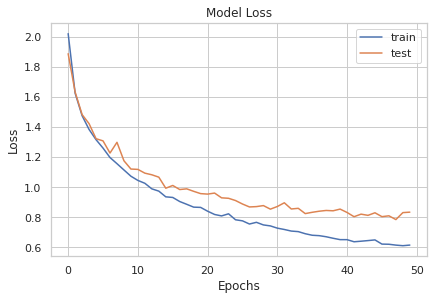

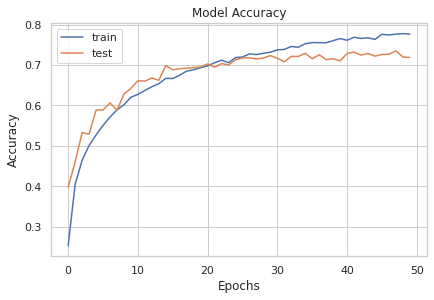

In [279]:
### YOUR CODE HERE ###
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()